In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
RANGE=120
HOSPITAL_OFFSET=7
ICU_OFFSET=14
FONT_SIZE=12
DEATH_DELAY=3

In [23]:
df_cases=pd.read_csv('https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/287fc645-4352-4477-9c8c-55bc054b7e76/download/daily_cuml_scot_20211206.csv', index_col='Date',parse_dates=True)
df_hospital=pd.read_csv('https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/2dd8534b-0a6f-4744-9253-9565d62f96c2/download/trend_hb_20211206.csv', index_col='Date',parse_dates=True)

df_hospital=df_hospital[df_hospital['HBName']=='Scotland']

(18851.0, 18969.0)

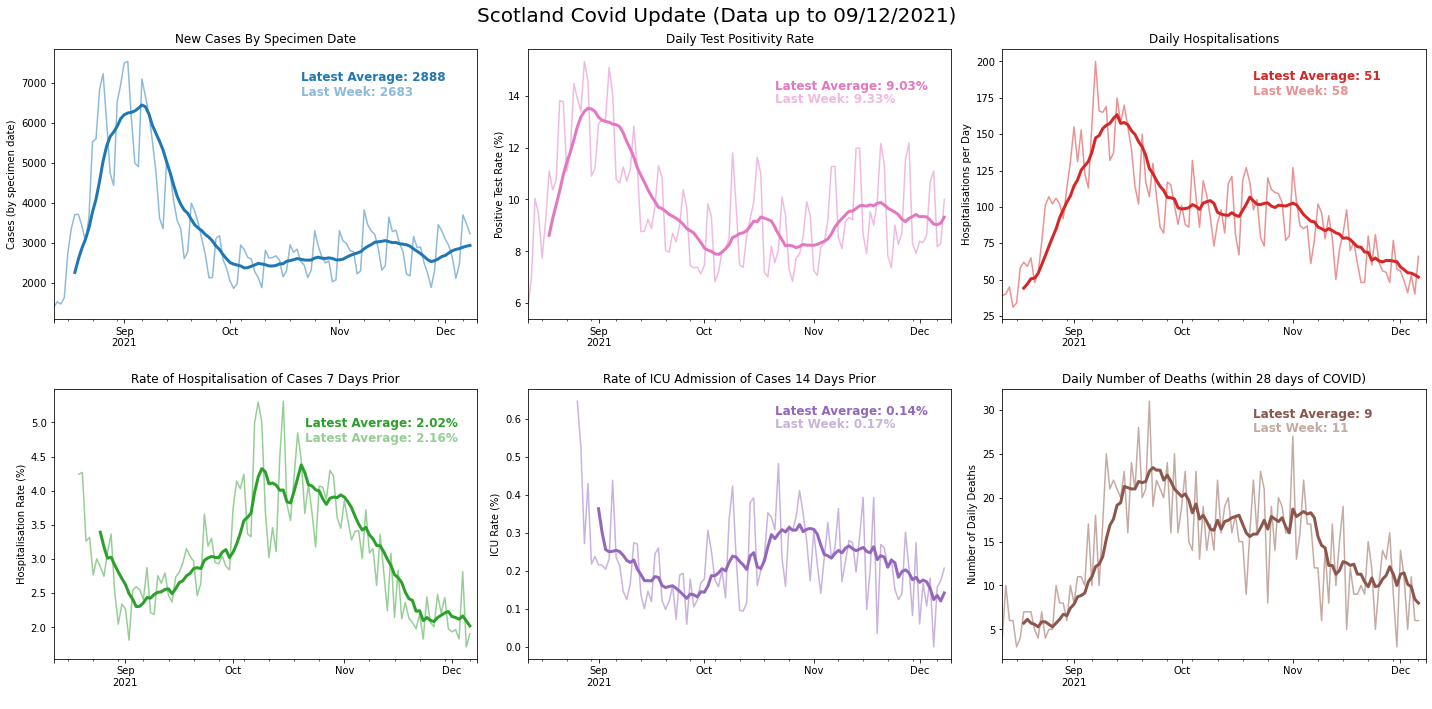

In [24]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Scotland Covid Update (Data up to '+df_cases.index[-1].strftime("%d/%m/%Y")+")", fontsize=20)

#
# Cases
#

plt.subplot(2,3,1)

df_cases['DailyCases'].iloc[-RANGE:-1].plot(alpha=0.5)
df_cases['DailyCases'].iloc[-RANGE:-1].rolling(window=7).mean().plot(lw=3,c='C0')

plt.ylabel('Cases (by specimen date)')
plt.xlabel(' ')
plt.title('New Cases By Specimen Date')

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(int(df_cases['DailyCases'].iloc[-RANGE:-1].rolling(window=7).mean()[-3])),x=df_cases['DailyCases'].index[-50],y=0.9*y_max,c='C0', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(int(df_cases['DailyCases'].iloc[-RANGE:-8].rolling(window=7).mean()[-1])),x=df_cases['DailyCases'].index[-50],y=0.85*y_max,c='C0', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

#
# Pos Rate
#

plt.subplot(2,3,2)
df_hospital['PositivePercentage'].iloc[-RANGE:-1].plot(alpha=0.5,c='C6')
df_hospital['PositivePercentage'].iloc[-RANGE:-1].rolling(window=7).mean().plot(lw=3,c='C6')

plt.ylabel('Positive Test Rate (%)')
plt.xlabel(' ')
plt.title('Daily Test Positivity Rate')

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(np.round(df_hospital['PositivePercentage'].iloc[-RANGE:-1].rolling(window=7).mean()[-3],2))+'%',x=df_hospital['PositivePercentage'].index[-50],y=0.9*y_max,c='C6', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(np.round(df_hospital['PositivePercentage'].iloc[-RANGE:-8].rolling(window=7).mean()[-1],2))+'%',x=df_hospital['PositivePercentage'].index[-50],y=0.87*y_max,c='C6', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

#
# Hospital Admissions
#

plt.subplot(2,3,3)
df_hospital['HospitalAdmissions'].iloc[-RANGE:-1].plot(alpha=0.5,c='C3')
df_hospital['HospitalAdmissions'].iloc[-RANGE:-1].rolling(window=7).mean().plot(lw=3,c='C3')

plt.ylabel('Hospitalisations per Day')
plt.xlabel(' ')
plt.title('Daily Hospitalisations')

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(int(df_hospital['HospitalAdmissions'].iloc[-RANGE:-1].rolling(window=7).mean()[-3])),x=df_hospital['HospitalAdmissions'].index[-50],y=0.9*y_max,c='C3', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(int(df_hospital['HospitalAdmissions'].iloc[-RANGE:-8].rolling(window=7).mean()[-1])),x=df_hospital['HospitalAdmissions'].index[-50],y=0.85*y_max,c='C3', fontsize=FONT_SIZE, weight='bold',alpha=0.5)


# 
# Hospitalisation Rate
#

plt.subplot(2,3,4)
((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).plot(c='C2',alpha=0.5)
((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean().plot(c='C2',lw=3)
plt.ylabel('Hospitalisation Rate (%)')
plt.xlabel(' ')
plt.title('Rate of Hospitalisation of Cases 7 Days Prior')

latest=((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean()[-3]
last_week=((df_hospital['HospitalAdmissions'].iloc[-RANGE:-8]/df_cases['DailyCases'].iloc[-RANGE:-8].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean()[-1]

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(np.round(latest,2))+'%',x=df_hospital['HospitalAdmissions'].index[-50],y=0.9*y_max,c='C2', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Latest Average: '+str(np.round(last_week,2))+'%',x=df_hospital['HospitalAdmissions'].index[-50],y=0.86*y_max,c='C2', fontsize=FONT_SIZE, weight='bold',alpha=0.5)


# 
# ICU Rate
#

plt.subplot(2,3,5)
df_hospital['ICUAdmissions']
((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100).plot(c='C4',alpha=0.5)
((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100).rolling(window=7).mean().plot(c='C4',lw=3)

plt.ylabel('ICU Rate (%)')
plt.xlabel(' ')
plt.title('Rate of ICU Admission of Cases 14 Days Prior')
plt.tight_layout()

latest=((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100).rolling(window=7).mean()[-1]
last_week=((df_hospital['ICUAdmissions'].iloc[-RANGE:-8]/df_cases['DailyCases'].iloc[-RANGE:-8].shift(ICU_OFFSET))*100).rolling(window=7).mean()[-1]
axes = plt.gca()
y_min, y_max = axes.get_ylim()
plt.text(s='Latest Average: '+str(np.round(latest,2))+'%',x=df_hospital['ICUAdmissions'].index[-50],y=0.9*y_max,c='C4', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(np.round(last_week,2))+'%',x=df_hospital['ICUAdmissions'].index[-50],y=0.85*y_max,c='C4', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

#
# Deaths
#

plt.subplot(2,3,6)
df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].plot(alpha=0.5,c='C5')
df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].rolling(window=7).mean().plot(lw=3,c='C5')

plt.ylabel('Number of Daily Deaths')
plt.xlabel(' ')
plt.title('Daily Number of Deaths (within 28 days of COVID)')
plt.tight_layout()
axes = plt.gca()
y_min, y_max = axes.get_ylim()
plt.text(s='Latest Average: '+str(int(df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].rolling(window=7).mean()[-3])),x=df_hospital['DailyDeaths'].index[-50],y=0.9*y_max,c='C5', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(int(df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY-7].rolling(window=7).mean()[-3])),x=df_hospital['DailyDeaths'].index[-50],y=0.85*y_max,c='C5', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

In [25]:
# df_cases.to_csv('df_cases.csv')
# df_hospital.to_csv('df_hospital.csv')
# data=pd.merge(df_hospital, df_cases, left_index=True, right_index=True)
# data.to_csv('merged_data.csv')

In [108]:

from plotly.subplots import make_subplots

specs=[[{"secondary_y": False}, {"secondary_y": False},{"secondary_y": False}], 
                           [{"secondary_y": False}, {"secondary_y": False},{"secondary_y": False}]
                           ]


fig = make_subplots(rows=2,cols=3,specs=specs, subplot_titles=['Cases','Positive Test Rate','Hospitalisations','Hospitalisation Rate', 'ICU Rate', 'Deaths'],vertical_spacing = 0.15,horizontal_spacing = 0.1)

#
# Cases
#
fig.add_scatter(x=df_cases.iloc[-RANGE:-1].index, y=df_cases['DailyCases'].iloc[-RANGE:-1], mode='lines',name='Cases',line_color='blue',opacity=0.25,row=1,col=1)
fig.add_scatter(x=df_cases.iloc[-RANGE:-1].rolling(window=7).mean().index, y=df_cases['DailyCases'].iloc[-RANGE:-1].rolling(window=7).mean(), mode='lines',name='Cases 7DMA',line_color='blue',line_width=3,row=1,col=1)

#
# Pos Rate
#

fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].index, y=df_hospital['PositivePercentage'].iloc[-RANGE:-1], mode='lines',name='Pos Rate',line_color='green',opacity=0.25,row=1,col=2)
fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].rolling(window=7).mean().index, y=df_hospital['PositivePercentage'].iloc[-RANGE:-1].rolling(window=7).mean(), mode='lines',name='Pos Rate',line_color='green',line_width=3,row=1,col=2)

#
# Hospital Admissions
#
fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].index, y=df_hospital['HospitalAdmissions'].iloc[-RANGE:-1], mode='lines',name='Admissions',line_color='red',opacity=0.25,row=1,col=3)
fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].rolling(window=7).mean().index, y=df_hospital['HospitalAdmissions'].iloc[-RANGE:-1].rolling(window=7).mean(), mode='lines',name='Admissions',line_color='red',line_width=3,row=1,col=3)

#
# Hosp Rate
#

fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].index, y=((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100), mode='lines',name='Hosp. Rate',line_color='purple',opacity=0.25,row=2,col=1)
fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].index, y=((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean(), mode='lines',name='Hosp. Rate',line_color='purple',line_width=3,row=2,col=1)

#
# ICU Rate
#

fig.add_scatter(x=df_hospital['ICUAdmissions'].iloc[-RANGE:-1].index, y=((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100), mode='lines',name='ICU Rate',line_color='brown',opacity=0.25,row=2,col=2)
fig.add_scatter(x=df_hospital['ICUAdmissions'].iloc[-RANGE:-1].index, y=((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100).rolling(window=7).mean(), mode='lines',name='ICU Rate',line_color='brown',line_width=3,row=2,col=2)

#
# Deaths
#

fig.add_scatter(x=df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].index, y=df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY], mode='lines',name='Hospitalisations',line_color='black',opacity=0.25,row=2,col=3)
fig.add_scatter(x=df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].index, y=df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].rolling(window=7).mean(), mode='lines',name='Hospitalisations7DMA',line_color='black',line_width=3,row=2,col=3)

fig['layout']['yaxis']['title']='Cases/Day'
fig['layout']['yaxis2']['title']='Positive Test Rate (%)'
fig['layout']['yaxis3']['title']='Admissions/Day'
fig['layout']['yaxis4']['title']='Hospitalisation Rate (%)'
fig['layout']['yaxis5']['title']='ICU Rate (%)'
fig['layout']['yaxis6']['title']='Deaths'

# fig.update_layout(
#     xaxis_range = [ df_cases.iloc[-RANGE:-1].index[0].date().strftime('%d-%m-%Y'), (df_cases.iloc[-RANGE:-1].index[-1].date()+pd.Timedelta(days=7)).strftime('%d-%m-%Y') ] 
# )
fig.update_xaxes(range = [df_cases.iloc[-RANGE:-1].index[0].date().strftime('%d-%m-%Y'), (df_cases.iloc[-RANGE:-1].index[-1].date()+pd.Timedelta(days=7)).strftime('%d-%m-%Y')])
fig.update_layout(height=600, width=1000, title_text="Scotland COVID Update (Data to "+df_cases.index[-1].strftime("%d/%m/%Y")+")", margin=dict(l=60, r=60, t=60, b=60))
fig.update_layout(showlegend=False)
fig.show()

In [115]:

import scipy.signal as signal
def xcorr(x,y):
    """
    Perform Cross-Correlation on x and y
    x    : 1st signal
    y    : 2nd signal

    returns
    lags : lags of correlation
    corr : coefficients of correlation
    """
    corr = signal.correlate(x, y, mode="full")
    lags = signal.correlation_lags(len(x), len(y), mode="full")
    return lags, corr
    
lags,corr=xcorr(df_hospital['HospitalAdmissions'].iloc[7:-7].values,df_cases['DailyCases'].iloc[7:-7].values)

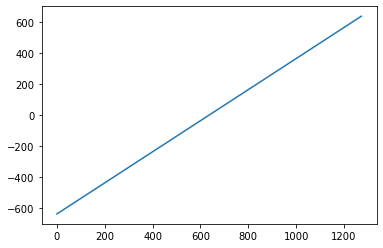

In [116]:
plt.plot(lags)